# Round 1 - Artificial Neural Networks 

Authors: Bhuwan Karki and Jyoti Prasad Bartaula

Most machine learning (ML) methods consist of three components: 

- (many) data points that are characterized by features and labels 
- a hypothesis space ("model") which is a collection of different predictor functions from features to labels
- a loss function which allows to measure the quality of a particular predictor function. 

<img src="ThreeBlocks.png" width="600">

Computationally, ML methods are optimization methods. These methods search (optimize) a predictor function, out of the hypothesis space, which incurs smallest average loss over some labeled data points ("training data"). 

<img src="MLOptProblem.png" width="600">

In order to efficiently search over the hypothesis space, which is a space of functions from feature vectors (having length up billions!) to label values ("cat" vs. "dog"), we need efficient (computer-friendly) representations of all the predictor functions making up the hypothesis space. 
 
One example of a computationally efficient representation of predictor functions is in the form of an artificial neural network (ANN). We can think of an ANN as a flow chart that describes how the inputs (features) are combined to obtain an output (predicted label). 

<img src="SomeANN.png" width="600">

Every ANN consists of interconnected basic computational units, which are referred to as artificial neurons. The simplest ANN is given by a single neuron.

<img src="SingleNeuron.png" width="600">

The neuron applies a non-linear function $g(z)$ to the weighted sum $z = w_{1}x_{1}+\ldots+w_{d}x_{d}+b$ of the inputs $x_{1},\ldots,x_{d}$ and the additional bias term $b$. The output $g(z)$ of a neuron is often referred to as **activation**. 

This round shows how to use a ANN to solve a simple classification task. This classification task amounts to predicting the product category based for a shop item. The prediction has to be computed based on an image of the item. 

In this round you will learn  

- how to load an image dataset from the `TensorFlow` package for Python. 
- how to visualize datapoints (images) represented by high-dimensional feature vectors. 
- why feature normalization is a good idea. 
- about weights and bias terms as tuning parameters of a ANN. 
- how to create and train a simple ANN using tensorflow library
- how to define and use training, validation and test set. ??? INCLUDE IN ROUND 0, ILLUSTRATE FOR GD IN LINREG????
- how to evaluate ("validate") the quality of the trained ANN.  

In [1]:
#  tensorflow library provides functions for deep neural networks 
import tensorflow as tf

# for reproducibility 
from numpy.random import seed
seed(1)
tf.random.set_seed(1)

# plotting 
import matplotlib.pyplot as plt


## Library Introduction
We will use <a href = 'https://www.tensorflow.org/'> TensorFlow </a> library in this notebook series. We will especially use [tf.keras](https://www.tensorflow.org/api_docs/python/tf/keras)  module  in TensorFlow  to build and train our model. 
**tf.keras** module is  Keras API integrated into TensorFlow 2.0. **Keras** is very popular deep learning library written in Python. It was originally created and developed by Google AI Developer/Researcher, <a href='https://twitter.com/fchollet'> Francois Chollet </a> starting in 2015.
When Google released TensorFlow 2.0 in June 2019, they declared that Keras is now the official high-level API of TensorFlow for quick and easy model design and training. We suggest you to go through following  materials which introduce TensorFlow, Keras, tf.keras, tensor and tensor operations.

- https://www.analyticsvidhya.com/blog/2020/03/tensorflow-2-tutorial-deep-learning/
- https://mlfromscratch.com/tensorflow-2/#/
- https://www.nintyzeros.com/2020/02/tensorflow-2x-tutorial-beginner-with-example.html
- https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/
- https://www.pyimagesearch.com/2019/10/21/keras-vs-tf-keras-whats-the-difference-in-tensorflow-2-0/

## Data

We consider a data set constituted by data points representing shop items. Each data point (shop item) is characterized by a feature vector $\mathbf{x}$ obtained from a $28 \times 28$ pixel grayscale image of the shop item. Each data point (shop item) belongs to one out of ten different product categories. We denote the category of a data point by the label $y \in \{0,\ldots,9\}$. The dataset is split into  a training set consisting of $60000$ data points and a test (or validatio) set of $10000$ data points. 

To summarize, we consider a data set $\big(\mathbf{x}^{(1)}, y^{(1)}\big),\ldots,\big(\mathbf{x}^{(m)}, y^{(m)}\big)$ 
- representing $m=10000$ different shop items. 
- with data points characterized by feature vector $\mathbf{x}^{(i)} \in \mathbb{R}^{n}$ with $n=28\cdot 28$ invidual features obtained from the grayscale values of an $28 \times 28$ pixel image of the $i$th shop item 
- with data points characterized by labels $y^{(i)} \in \{0,\ldots,9 \}$. 

????0,000 training examples
- containing 10,000 test (validation) examples DO WE NEED THIS SPLIT HERE ? ????
- with data points belonging to ten different classes
- with data points characterized by a 28×28 grayscale ("single channel") image

In [2]:
# load dataset
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

So, we can see that dataset consists of well defined train and test set.

In [3]:
# shape of train and test image
print(f'Number of training examples{train_images.shape}')
print(f'Number of test examples{test_images.shape}')

Number of training examples(60000, 28, 28)
Number of test examples(10000, 28, 28)


In [7]:
import numpy as np 

# The labels are an array of integers, in the range [0, 9]. 
# These correspond to the class of clothing item the image represents:
labels = np.unique(test_labels)
print(labels)

[0 1 2 3 4 5 6 7 8 9]


In [8]:
# let's map each images labels to item name
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [9]:
print('label value \t\t category')
for class_name, label in zip(class_names, labels):
    print (f'{label} \t\t {class_name}')

label value 		 category
0 		 T-shirt/top
1 		 Trouser
2 		 Pullover
3 		 Dress
4 		 Coat
5 		 Sandal
6 		 Shirt
7 		 Sneaker
8 		 Bag
9 		 Ankle boot


Let's visualize the few data points to see how the images looks like.

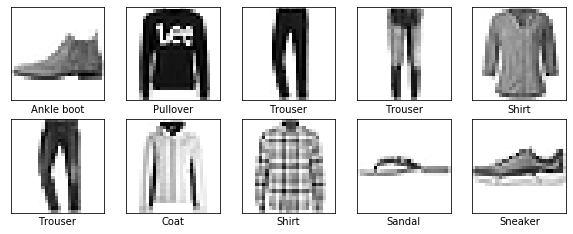

In [10]:
# Visualizing some images
plt.figure(figsize=(10,10))
i = 0
for (image, label) in zip(test_images[:10],test_labels[:10]):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

Each shop item is characterized by the feature vector $\mathbf{x}^{(i)} = \big(x_{1}^{(i)},\ldots,x_{n}^{(i)}\big)^{T}$. The individual features $x^{(i)}_{j}$ are grayscale values of individual pixels in an $28 \times 28$ pixel image. For a black pixel, $x^{(i)}_{j}=0$ while for a white pixel $x^{(i)}_{j}=255$. The code snippet below reads in 

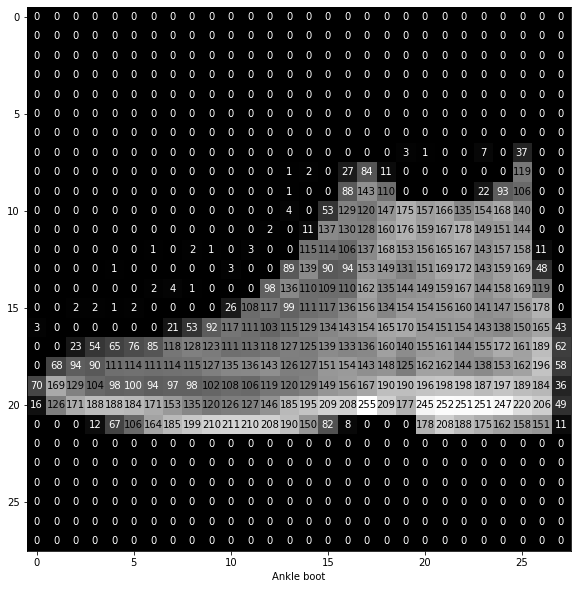

In [11]:
img = np.squeeze(test_images[:1]) # select the image to visualize
fig = plt.figure(figsize = (10,10)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = (img[x][y])
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')
ax.set_xlabel(class_names[9]);

## Representing Predictions Functions using ANN 

Here we explain weights, bias terms ... 

## Network architecture 


The problem we are trying to solve is to classify the images of fashion item into 10 categories (0-9). For that we need to first define our neural network architecture. 
 We will use [ sequential API in tf.keras](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) to define our model.

Our network consists of sequence of following layers:
- input layer
- two dense layers (also called fully-connected layer)

The first layer in our model is input layer which is entry point to network. The first Dense layer has 128 nodes (or neurons). The second (and last) dense layer has 10 nodes with softmax activation function. This layer is  output layer as it  returns an array of 10 probability scores that sum to 1.  Each score will be the probability that the each image (data point) belongs to one of 10 fashion item classes.

In [12]:
# define model architecture
model = tf.keras.Sequential(
        [
        tf.keras.layers.Input(shape=(784,)),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

We can call summary() method on model to see information about model. **.summary()** method provides following textual information about model.
- The number of parameters (weights) in each layer.
- The total number of parameters (weights) in the model.
- The layers and their order in the model.
- The output shape of each layer. 

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


From above outout we can see that the model has total of 101,770 parameters (weights and bias) to train.

Model summary printed above is useful for simple models. But it can be confusing for model that have multiple inputs or outputs. tf.keras module provides a function called 'plot_model' in it's tf.keras.utils namespace to create a plot of the network neural network graph that can make more complex models easier to understand. This function will create plot of the network.

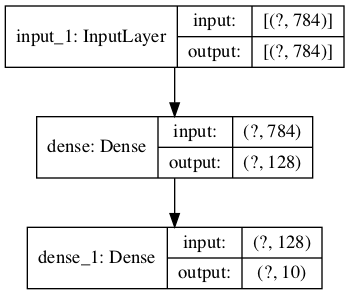

In [14]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',show_shapes=True, show_layer_names=True)

Before we can train our model, we still need to define three more components as a part of model compilation step:
- an optimizer
- a loss function
- metric to assess the model performance

In [15]:
### Compile the model
model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Before we process to train and evaluate the model, we will preprocess the data by reshaping it into the shape our model expect, and scaling it so that pixel values lies between 0-1.  While training the neural network it is good practice to normalize the pixel values so that each pixel value has a value between 0 and 1.
Since the first the layer in our model is input layer with dimensionality of 784 but our training images are stored in an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval. We need to transform it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1. 

In [16]:
# reshape the training and test images
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

# Normalize data to have feature values between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

**Additional Material**

- video lecture of Prof. Ng on normalization https://www.youtube.com/watch?v=FDCfw-YqWTE

Since we have used categorical_crossentropy loss function in our model, we also need to categorically encode the class labels.

In [17]:
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels_int = np.copy(test_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

Additiona Material
- <a href='https://www.youtube.com/watch?v=v_4KWmkwmsU'>One-hot Encoding explained</a>

We are now ready to train our network, which is done via a call to the 'fit' method. Before we run following line of code, let's understand two parameters in fit function: validation_split and epochs. 
- **validation_spit:** : valiation_split is used to separate a portion of our training data into a validation dataset and evaluate the performance of our model on that validation dataset each epoch. We can specify the percentage we want to allocate to the validation set by setting this validation_split argument on the fit() function to a percentage of the size of our training dataset.

 So, why do we need validation set anyway? Validation set is used to estimate the performance of a model for a given training run(epoch). Meaning we will use training set to train the model and use validation set (data that's not seen by model during training) to predict while model is being trained.  This will helps us to get insight into whether our model is overfitting or not. We can find out if model is overfitting or not by comparing the accuracy and loss from our training samples to the validation accuracy and validation loss from our validation samples. Further, we can also use these accuracy measures from  these two different set to tune the hyper-parameters (like learning rate, number of epochs the model should be trained) of model.
 
 
- **epochs**: This parameter controls the number of times we want our entire training dataset to be passed forward and backward through the neural network.

**Additional Material**
- <a href='http://faroit.com/keras-docs/2.0.2/getting-started/faq/#what-does-sample-batch-epoch-mean'>What does "sample", "batch", "epoch" mean? From Keras FAQ </a>
- <a href = 'https://www.coursera.org/lecture/big-data-machine-learning/using-a-validation-set-Pb8Cl'> Using a Validation Set, video lecture by Mai Nguyen on Coursera </a>
- Train, Test, & Validation Sets explained. https://www.youtube.com/watch?v=Zi-0rlM4RDs

In [18]:
History = model.fit(train_images, train_labels, validation_split=0.2, epochs=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 4s 87us/sample - loss: 1.6766 - accuracy: 0.7943 - val_loss: 1.6314 - val_accuracy: 0.8328
Epoch 2/2
48000/48000 [==============================] - 4s 81us/sample - loss: 1.6248 - accuracy: 0.8384 - val_loss: 1.6428 - val_accuracy: 0.8197


## Visualize Model Training History 

The 'fit' method on Keras returns the History object. It records training metrics for each epoch. The metrics are stored as dictionary in 'History.history' attribute of History object. We can use metrics collected in History object to create plots. The plot can be used to assess various information about the model.

- convergence speed of model over epoch
- whether the model has already converged or not 
- whether the model is over-fitting or not and other 

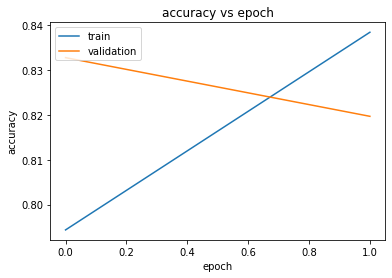

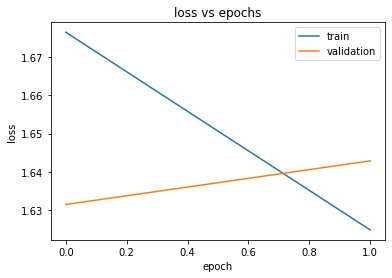

In [19]:
# summarize history for accuracy
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('accuracy vs epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('loss vs epochs')# Let's plot the 


plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## Evaluate the model on test set

Let's see the accuracy of our model on test set. 

In [20]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 51us/sample - loss: 1.6474 - accuracy: 0.8135


In [21]:
print('Accuracy on test dataset:', test_accuracy)

Accuracy on test dataset: 0.8135


## Visualizing the prediction result

So, we have now trained the model and evaluated its performance on training and test set. Let's see the result of model prediction on individual image. 

In [22]:
#get the predictions for the test data
predicted_classes = model.predict_classes(test_images.reshape(-1,28*28))

#get true test_label
y_true=test_labels_int

# get the indices of correctly and incorrectly predicted test data points
correct_indices=np.nonzero(predicted_classes==y_true)[0]


incorrect_indices=np.nonzero(predicted_classes!=y_true)[0]

Let's visualize the prediction result.

In [23]:
# plot the predicted label and true label of image

def plot_image(i, true_labels, images):
    
    ''' function to plot prediction result along with class probability
    
    arguments :
    
     i : test image index
     true_labels : true class label of test set images
     images : test set images
    
    '''
    img=(images[i])
    img=np.array([img])
    predictions_array=model.predict([img])
    true_label=true_labels[i].argmax()
    fig, (ax1,ax2) = plt.subplots(figsize=(6,9),ncols=2)
    ax1.grid(False)
    ax1.set_xticks([])
    ax1.set_yticks([])
  
    ax1.imshow(img.reshape(28,28), cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    ax1.set_xlabel("Predicted : {} {:2.0f}% \n True label:({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
 
    ax2.barh(np.arange(10), predictions_array.squeeze())
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(class_names, size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    print(predictions_array)
    plt.tight_layout()
    

[[8.4091690e-14 4.2168244e-13 6.3485367e-12 1.1651762e-11 2.6610671e-08
  5.8810692e-03 1.7315003e-08 6.2601652e-04 1.7350287e-05 9.9347550e-01]]


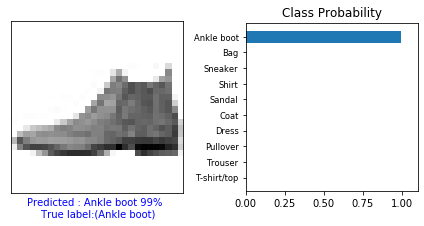

In [24]:
plot_image(correct_indices[0],test_labels, test_images)

So, above visualization shows that even though our model correctly classfied this specific image as Ankle boot, but with only 71 percentage certainty.

Similarly, lets visualize incorrectly classified images.

[[2.1361064e-20 2.1731205e-24 1.4588139e-07 2.7710885e-17 3.5680712e-09
  6.6458849e-21 9.9999988e-01 3.3264596e-29 1.0769593e-09 3.8322663e-22]]


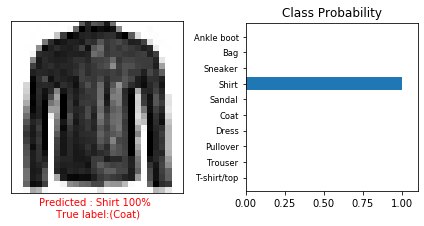

In [25]:
plot_image(incorrect_indices[10],test_labels, test_images)